In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
iris_data = iris['data']
df = pd.DataFrame(iris_data,columns=iris['feature_names'])
y = iris['target']
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
X = df[['petal length (cm)','petal width (cm)']].values

In [5]:
from sklearn.svm import SVC

In [6]:
C = 5
clf = SVC(kernel='linear',C=C)
clf.fit(X,y)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
Xv = X.reshape(-1,1)
xmin,xmax = Xv.min()-1,Xv.max()+1
ymin,ymax = y.min()-1,y.max()+1

In [8]:
h = 0.2
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

In [9]:
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

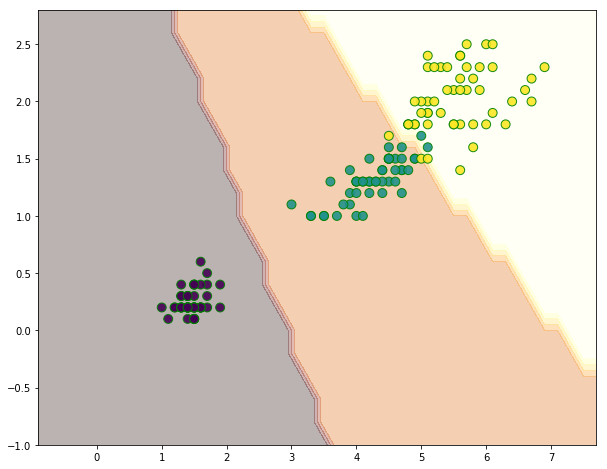

In [14]:
plt.figure(figsize=(10,8))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='g',alpha=0.9,s=80)
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix

In [16]:
score = cross_val_score(clf,X,y,cv=4)

In [17]:
np.mean(score),np.std(score)

(0.9599358974358974, 0.030867564558106138)

In [18]:
y_predict = cross_val_predict(clf,X,y,cv=4)
confusion_matrix(y,y_predict)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.preprocessing import StandardScaler

In [79]:
std_scaler_x = StandardScaler()
X_train_std = std_scaler_x.fit_transform(X_train)

In [131]:
C = 0.3
classifier = SVC(kernel='rbf',C=C)
classifier.fit(X_train_std,y_train)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [132]:
y_train_pred = classifier.predict(X_train_std)

In [133]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix

In [134]:
#X_test_std = std_scaler_x.fit_transform(X_test)

In [135]:
#y_test_pred = classifier.predict(X_test_std)

In [136]:
confusion_matrix(y_train,y_train_pred)

array([[41,  0,  0],
       [ 0, 35,  2],
       [ 0,  2, 40]], dtype=int64)

In [137]:
x_min,x_max = X_train_std[:,0].min()-1,X_train_std[:,0].max()+1
y_min,y_max = X_train_std[:,1].min()-1,X_train_std[:,1].max()+1
h=0.2
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [138]:
z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

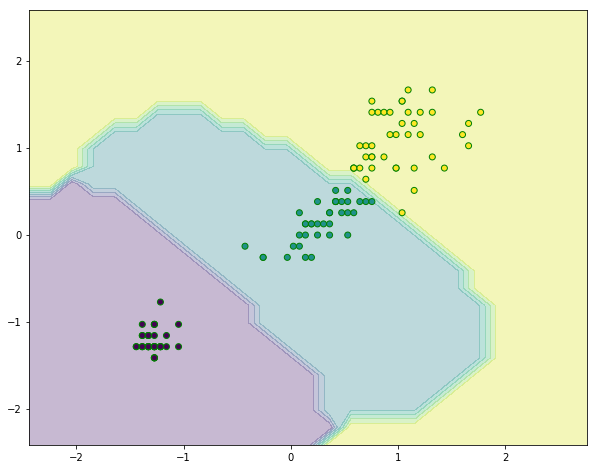

In [139]:
plt.figure(figsize=(10,8))
ax = plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(X_train_std[:,0],X_train_std[:,1],c=y_train_pred,edgecolors='g')
plt.show()